In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Problem Statement:Performance by looking at the metric - which is 95th Percentile on Order Delivery time should be less than 31 mins.


In [2]:
df=pd.read_csv('diminos_data.csv')
df

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


In [3]:
df.shape

(15000, 3)

In [4]:
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [6]:
df['order_placed_at']=pd.to_datetime(df['order_placed_at'])
print(df['order_placed_at'].dtypes)

datetime64[ns]


In [7]:
df['order_delivered_at']=pd.to_datetime(df['order_delivered_at'])
print(df['order_delivered_at'].dtypes)

datetime64[ns]


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


In [9]:
df.isnull().sum()

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64

In [10]:
df['order_placed_date']=df['order_placed_at'].dt.date
print(df['order_placed_date'])  


0        2023-03-01
1        2023-03-01
2        2023-03-01
3        2023-03-01
4        2023-03-01
            ...    
14995    2023-03-27
14996    2023-03-27
14997    2023-03-27
14998    2023-03-27
14999    2023-03-27
Name: order_placed_date, Length: 15000, dtype: object


In [11]:
df

,order_id,order_placed_at,order_delivered_at,order_placed_date
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-01
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-01
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-01
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-01
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-01
...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,2023-03-27
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,2023-03-27
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,2023-03-27
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,2023-03-27


In [12]:
df['total_time_taken'] = (df['order_delivered_at'] - df['order_placed_at'])
print(df['total_time_taken'])

0       0 days 00:17:08.443132
1       0 days 00:15:35.925241
2       0 days 00:15:06.291385
3       0 days 00:38:32.019399
4       0 days 00:16:10.619056
                 ...          
14995   0 days 00:15:32.409378
14996   0 days 00:16:44.672912
14997   0 days 00:15:24.676238
14998   0 days 00:15:57.810358
14999   0 days 00:15:22.499311
Name: total_time_taken, Length: 15000, dtype: timedelta64[ns]


In [13]:
df

,order_id,order_placed_at,order_delivered_at,order_placed_date,total_time_taken
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-01,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-01,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-01,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-01,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-01,0 days 00:16:10.619056
...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,2023-03-27,0 days 00:15:32.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,2023-03-27,0 days 00:16:44.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,2023-03-27,0 days 00:15:24.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,2023-03-27,0 days 00:15:57.810358


In [14]:
df['Day']=df['order_placed_at'].dt.day_name()
df

,order_id,order_placed_at,order_delivered_at,order_placed_date,total_time_taken,Day
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-01,0 days 00:17:08.443132,Wednesday
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-01,0 days 00:15:35.925241,Wednesday
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-01,0 days 00:15:06.291385,Wednesday
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-01,0 days 00:38:32.019399,Wednesday
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-01,0 days 00:16:10.619056,Wednesday
...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,2023-03-27,0 days 00:15:32.409378,Monday
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,2023-03-27,0 days 00:16:44.672912,Monday
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,2023-03-27,0 days 00:15:24.676238,Monday
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,2023-03-27,0 days 00:15:57.810358,Monday


In [15]:
df['Date']=df["order_placed_at"].dt.day
df

,order_id,order_placed_at,order_delivered_at,order_placed_date,total_time_taken,Day,Date
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-01,0 days 00:17:08.443132,Wednesday,1
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-01,0 days 00:15:35.925241,Wednesday,1
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-01,0 days 00:15:06.291385,Wednesday,1
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-01,0 days 00:38:32.019399,Wednesday,1
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-01,0 days 00:16:10.619056,Wednesday,1
...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,2023-03-27,0 days 00:15:32.409378,Monday,27
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,2023-03-27,0 days 00:16:44.672912,Monday,27
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,2023-03-27,0 days 00:15:24.676238,Monday,27
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,2023-03-27,0 days 00:15:57.810358,Monday,27


In [16]:
df['total_time_taken_min'] = df['total_time_taken'].dt.total_seconds()/60
df


,order_id,order_placed_at,order_delivered_at,order_placed_date,total_time_taken,Day,Date,total_time_taken_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,2023-03-01,0 days 00:17:08.443132,Wednesday,1,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,2023-03-01,0 days 00:15:35.925241,Wednesday,1,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,2023-03-01,0 days 00:15:06.291385,Wednesday,1,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,2023-03-01,0 days 00:38:32.019399,Wednesday,1,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,2023-03-01,0 days 00:16:10.619056,Wednesday,1,16.176984
...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,2023-03-27,0 days 00:15:32.409378,Monday,27,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,2023-03-27,0 days 00:16:44.672912,Monday,27,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,2023-03-27,0 days 00:15:24.676238,Monday,27,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,2023-03-27,0 days 00:15:57.810358,Monday,27,15.963506


In [17]:
df['total_time_taken_min'].mean()

20.499389326467746

In [18]:
df['total_time_taken_min'].median()

15.797986066666668

In [19]:
df['total_time_taken_min'].std()

96.1603618021647

<AxesSubplot:>

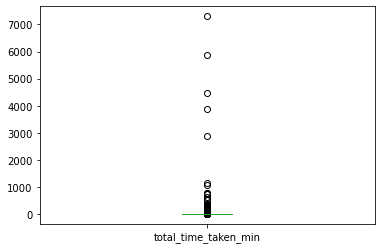

In [20]:
df['total_time_taken_min'].plot(kind='box')

In [21]:
clean_df=df[df['total_time_taken_min']<40]                            #### There is 331 pizza who takes more than 40 minutes..
clean_df.shape

(14669, 8)

<AxesSubplot:>

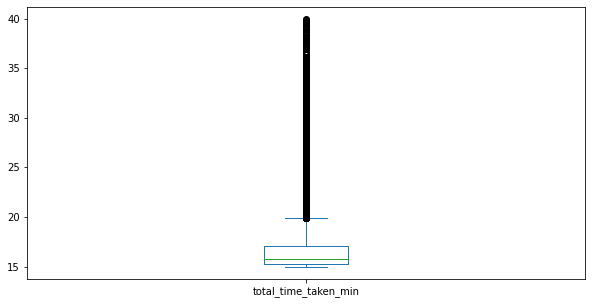

In [22]:
clean_df['total_time_taken_min'].plot(kind='box',figsize=(10,5))

In [23]:
clean_df['total_time_taken_min'].mean()

16.992519561709482

In [24]:
clean_df['total_time_taken_min'].median()

15.763923250000001

In [25]:
clean_df['total_time_taken_min'].max()

39.91894656666667

In [26]:
clean_df['total_time_taken_min'].min()

15.000010333333334

In [27]:
clean_df['total_time_taken_min'].quantile(0.25)

15.266571800000001

In [28]:
clean_df['total_time_taken_min'].quantile(0.75)

17.0995124

In [29]:
clean_df['total_time_taken_min'].quantile(0.95)

23.596276583333314

In [30]:
clean_df[clean_df['total_time_taken_min']>31].shape

(226, 8)

#### =============== MAXIMUM/MINIMUM ORDER PLACED=================

In [31]:
## Date of Maximum/Minimum orders

In [32]:
df['order_placed_date'].value_counts()              

2023-03-20    597
2023-03-22    591
2023-03-02    588
2023-03-10    587
2023-03-23    583
2023-03-06    582
2023-03-12    582
2023-03-08    578
2023-03-07    570
2023-03-04    567
2023-03-24    565
2023-03-09    564
2023-03-18    559
2023-03-27    551
2023-03-05    551
2023-03-01    550
2023-03-25    547
2023-03-16    545
2023-03-15    540
2023-03-17    537
2023-03-11    536
2023-03-03    534
2023-03-26    532
2023-03-19    526
2023-03-13    526
2023-03-21    520
2023-03-14    492
Name: order_placed_date, dtype: int64

<AxesSubplot:>

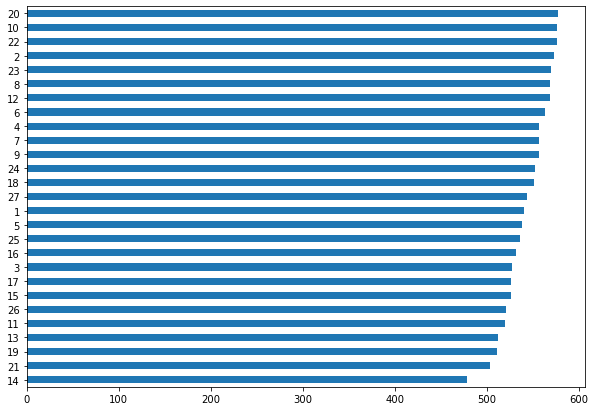

In [33]:
clean_df['Date'].value_counts().sort_values().plot(kind='barh',figsize=(10,7))

<AxesSubplot:>

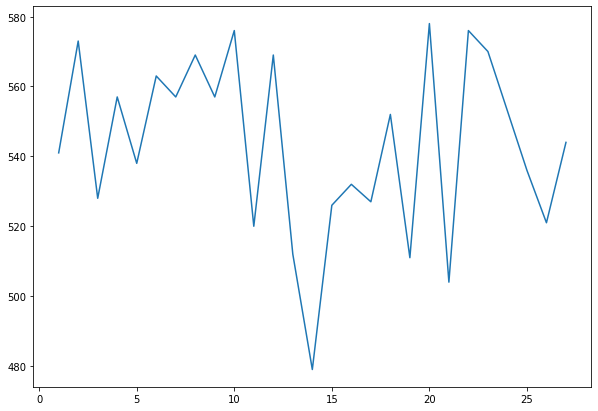

In [34]:
clean_df['Date'].value_counts().sort_index().plot(kind='line',figsize=(10,7))

---------------Maximum order placed at 20th march with 597 orders--------------
---------------Minimum order placed at 14th March with 492 orders--------------

In [35]:
#### Day of Maximum/Minimum Orders

<AxesSubplot:>

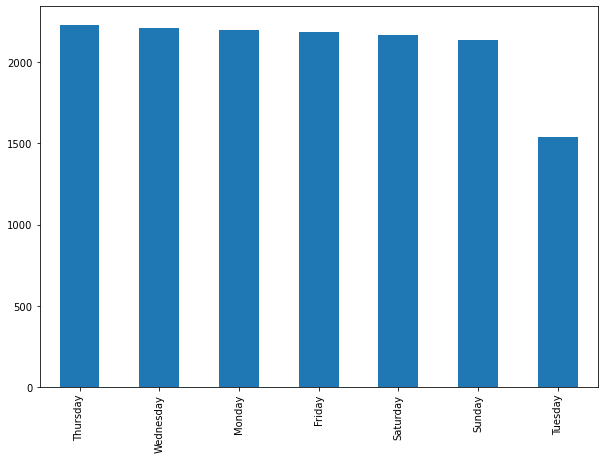

In [36]:
clean_df['Day'].value_counts().plot(kind='bar',figsize=(10,7))

In [37]:
clean_df['Day'].value_counts()

Thursday     2232
Wednesday    2212
Monday       2197
Friday       2184
Saturday     2165
Sunday       2139
Tuesday      1540
Name: Day, dtype: int64

----------------Maximum order placed on Thursday with 2280 orders-----------
----------------Minimum order placed on Tuesday with 1582 orders------------

#### ====================AVERAGE ORDER====================

In [38]:
df['order_placed_date'].value_counts().mean()

555.5555555555555

------------Average order placed per day=555---------------